In [0]:

batch_size = 128
num_classes = 10
epochs = 50

# input image dimensions
img_rows, img_cols = 28, 28

In [12]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [20]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py






model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 204us/step - loss: 0.5542 - acc: 0.8218 - val_loss: 0.0947 - val_acc: 0.9721
Epoch 2/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.1532 - acc: 0.9567 - val_loss: 0.0647 - val_acc: 0.9796
Epoch 3/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.1115 - acc: 0.9693 - val_loss: 0.0588 - val_acc: 0.9823
Epoch 4/50
60000/60000 [==============================] - 9s 151us/step - loss: 0.0912 - acc: 0.9748 - val_loss: 0.0494 - val_acc: 0.9853
Epoch 5/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.0751 - acc: 0.9792 - val_loss: 0.0441 - val_acc: 0.9874
Epoch 6/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.0668 - acc: 0.9815 - val_loss: 0.0404 - val_acc: 0.9882
Epoch 7/50
60000/60000 [========================

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
import warnings
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [10, 5]
warnings.filterwarnings("ignore", category=FutureWarning)
%config InlineBackend.figure_format = 'retina'

Test score: 0.06147524185255345
Test accuracy: 0.9914


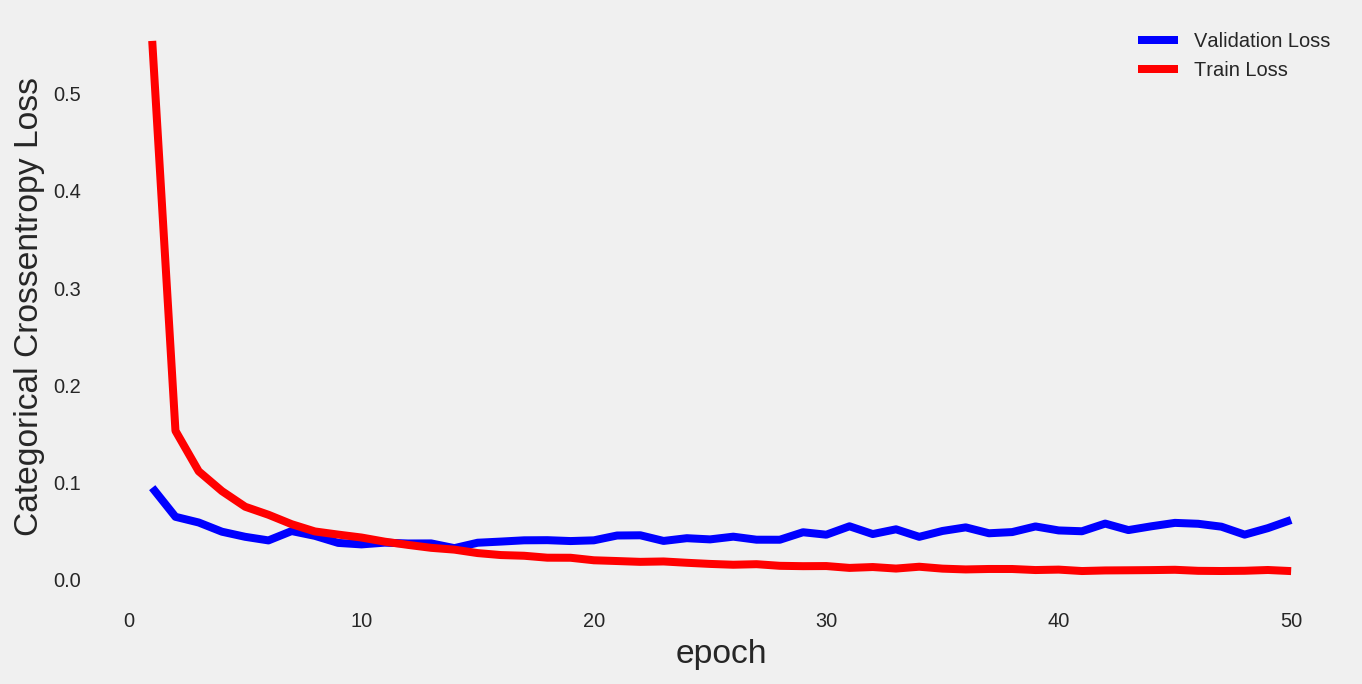

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs +1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

__Adam optimizer__

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 13s 212us/step - loss: 0.5378 - acc: 0.8265 - val_loss: 0.1044 - val_acc: 0.9673
Epoch 2/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.1646 - acc: 0.9543 - val_loss: 0.0596 - val_acc: 0.9810
Epoch 3/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.1137 - acc: 0.9684 - val_loss: 0.0506 - val_acc: 0.9852
Epoch 4/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.0901 - acc: 0.9745 - val_loss: 0.0487 - val_acc: 0.9856
Epoch 5/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.0780 - acc: 0.9789 - val_loss: 0.0444 - val_acc: 0.9861
Epoch 6/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.0678 - acc: 0.9816 - val_loss: 0.0350 - val_acc: 0.9897
Epoch 7/50
60000/60000 [========================

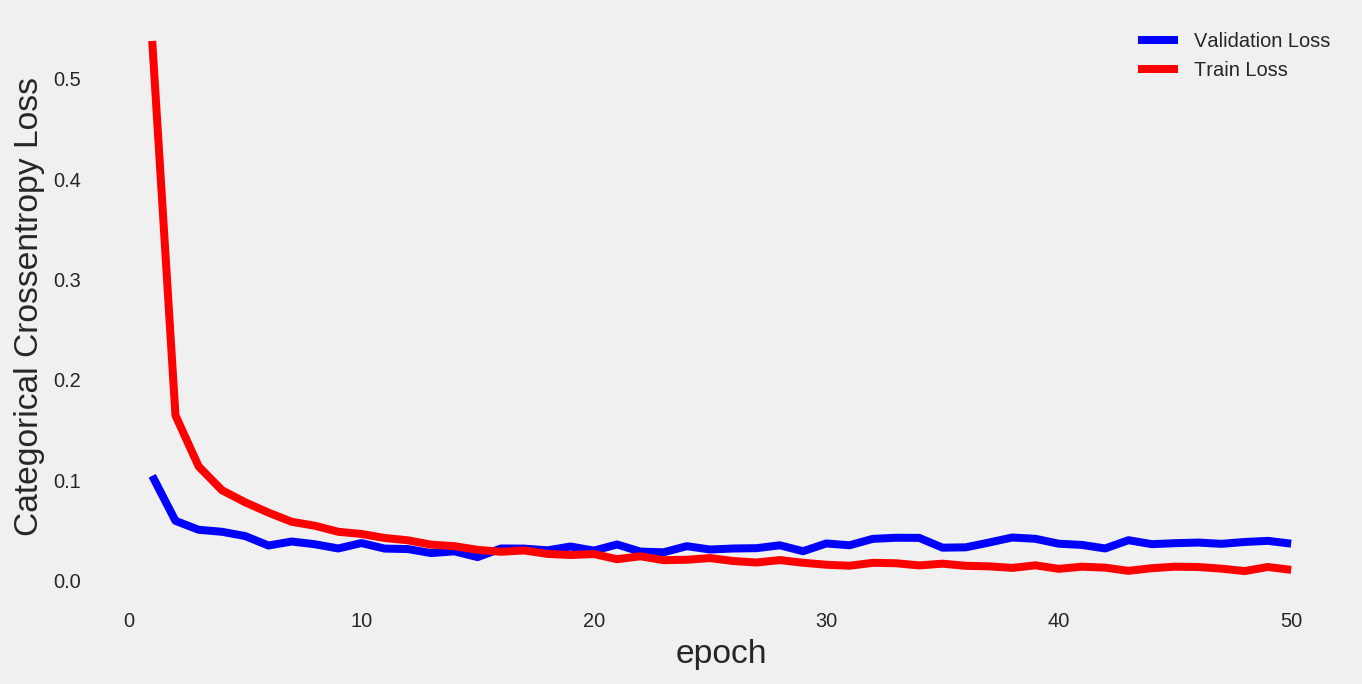

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K



# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs +1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 270us/step - loss: 0.4977 - acc: 0.8391 - val_loss: 0.0779 - val_acc: 0.9766
Epoch 2/50
60000/60000 [==============================] - 12s 202us/step - loss: 0.1300 - acc: 0.9636 - val_loss: 0.0481 - val_acc: 0.9852
Epoch 3/50
60000/60000 [==============================] - 12s 202us/step - loss: 0.0908 - acc: 0.9756 - val_loss: 0.0349 - val_acc: 0.9901
Epoch 4/50
60000/60000 [==============================] - 12s 202us/step - loss: 0.0765 - acc: 0.9792 - val_loss: 0.0351 - val_acc: 0.9890
Epoch 5/50
60000/60000 [==============================] - 12s 202us/step - loss: 0.0610 - acc: 0.9834 - val_loss: 0.0273 - val_acc: 0.9906
Epoch 6/50
60000/60000 [==============================] - 12s 202us/step - loss: 0.0525 - acc: 0.9858 - val_loss: 0.0261 - val_acc: 0.9920
Epoch 7/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.0458 - acc: 0.9880 - val_loss: 0.

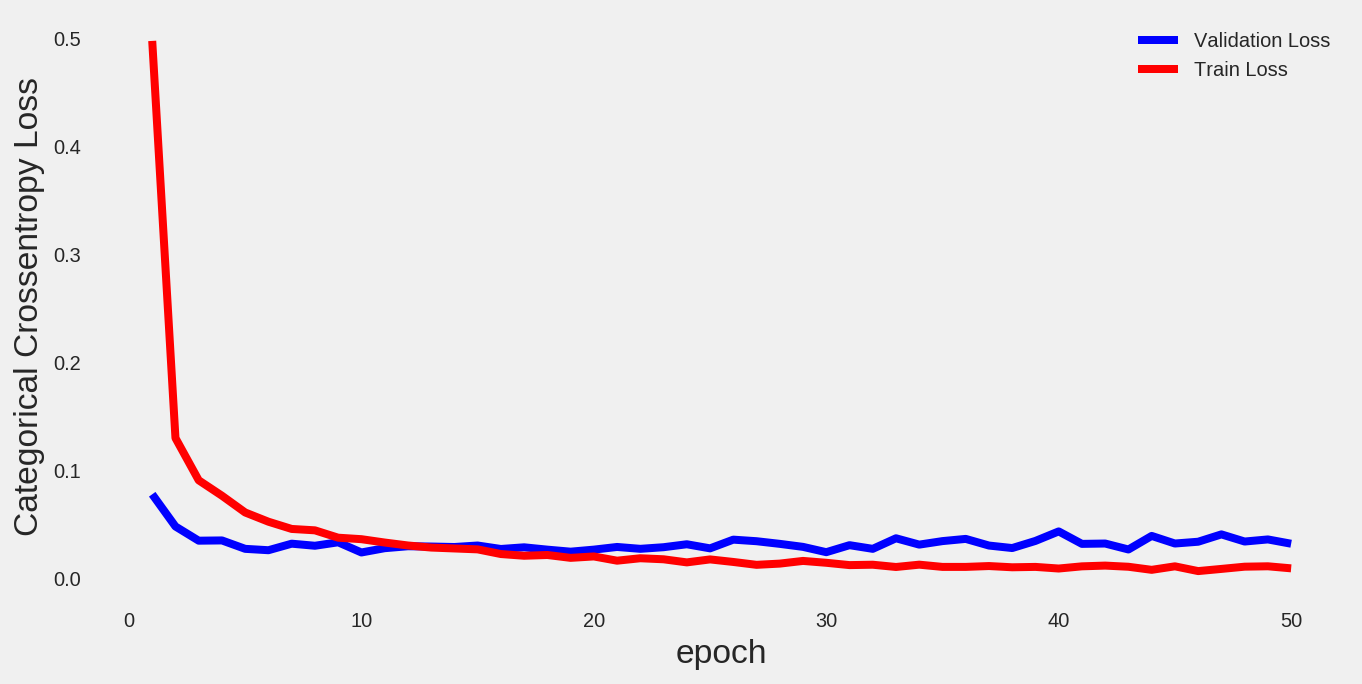

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))

model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs +1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

__Batch Normalisation__

In [0]:
from keras.layers.normalization import BatchNormalization

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 230us/step - loss: 0.4405 - acc: 0.8596 - val_loss: 0.0913 - val_acc: 0.9722
Epoch 2/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.1328 - acc: 0.9607 - val_loss: 0.0561 - val_acc: 0.9828
Epoch 3/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.0934 - acc: 0.9730 - val_loss: 0.0501 - val_acc: 0.9859
Epoch 4/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.0754 - acc: 0.9779 - val_loss: 0.0424 - val_acc: 0.9883
Epoch 5/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.0626 - acc: 0.9820 - val_loss: 0.0416 - val_acc: 0.9879
Epoch 6/50
60000/60000 [

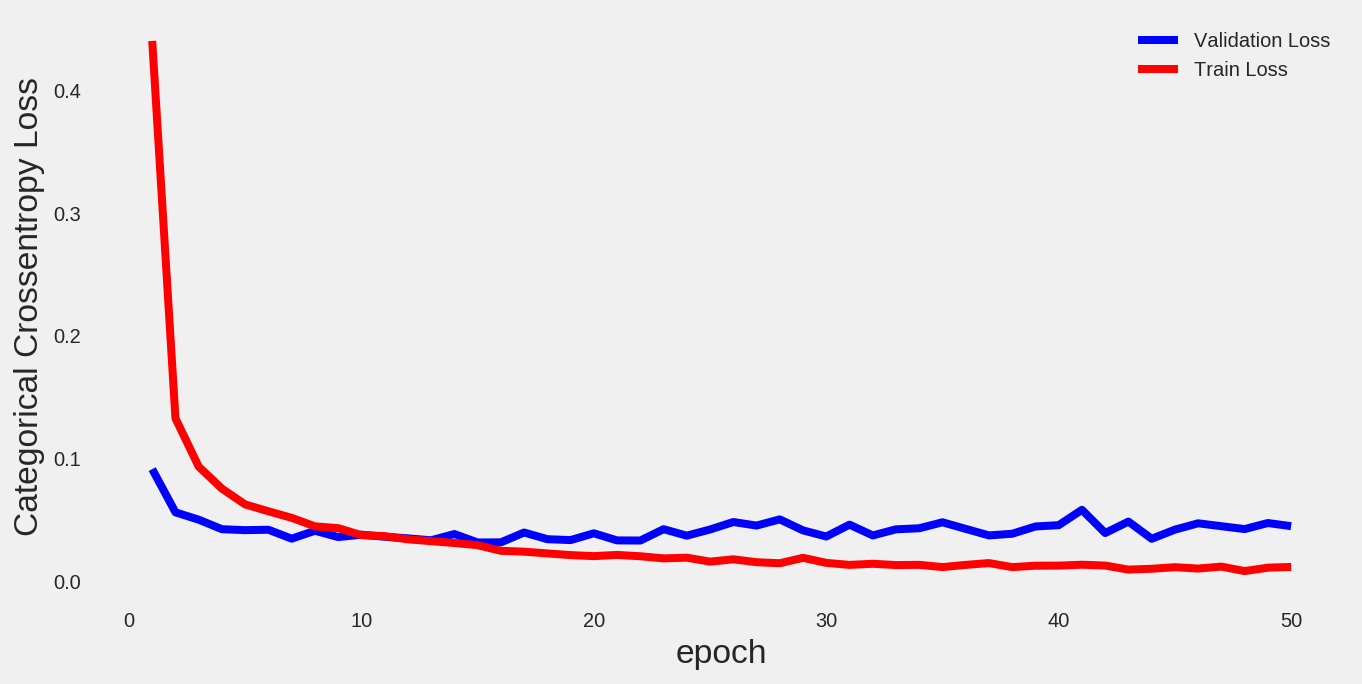

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=input_shape))
BatchNormalization(axis=1)
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
BatchNormalization(axis=1)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
BatchNormalization(axis=1)
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
BatchNormalization(axis=1)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs +1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 152us/step - loss: 0.3979 - acc: 0.8737 - val_loss: 0.1009 - val_acc: 0.9697
Epoch 2/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.1302 - acc: 0.9610 - val_loss: 0.0717 - val_acc: 0.9776
Epoch 3/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.0945 - acc: 0.9714 - val_loss: 0.0512 - val_acc: 0.9845
Epoch 4/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.0726 - acc: 0.9790 - val_loss: 0.0414 - val_acc: 0.9872
Epoch 5/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.0610 - acc: 0.9816 - val_loss: 0.0390 - val_acc: 0.9885
Epoch 6/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.0544 - acc: 0.9832 - val_loss: 0.0371 - val_acc: 0.9900
Epoch 7/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.0466 - acc: 0.9856 - val_loss: 0.0356 - 

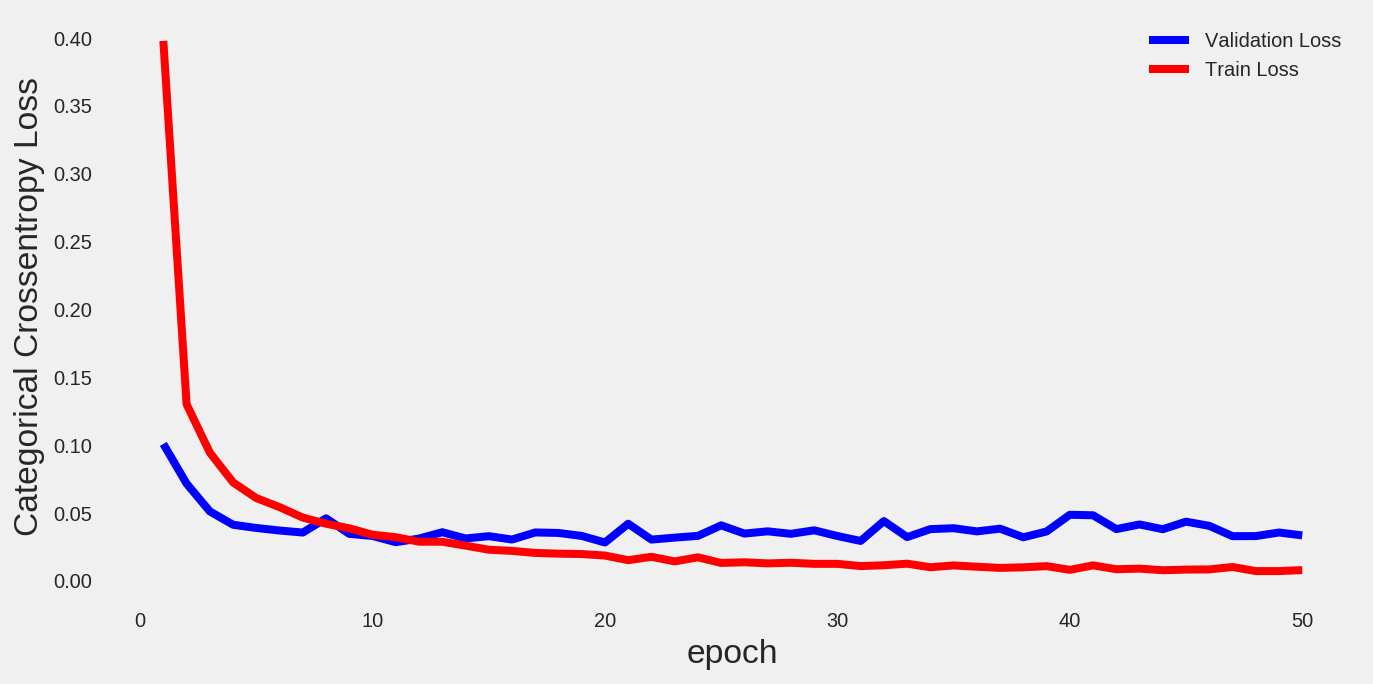

In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(6, 6),
                 activation='relu',
                 input_shape=input_shape))
BatchNormalization(axis=1)
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
BatchNormalization(axis=1)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
BatchNormalization(axis=1)
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
BatchNormalization(axis=1)
model.add(Dense(512, activation='relu'))
BatchNormalization(axis=1)
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])






score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs +1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [25]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["S.R",'Model',"Test loss","Accuracy",]

x.add_row([(1),"AdaDelta_Optimizer", 0.0614, '99.14%'])
x.add_row([(2),"Adam_optimizer",  0.036, '99.25%'])
x.add_row([(3),'deep network with adam', 0.032, '99.35%'])
x.add_row([(4),'Batch normalisation', 0.044, '99.16%'])
x.add_row([(5),'Replacing The dropout with Batch normalisation', 0.033, '99.35%'])


print(x.get_string(title = "-----SUMMARY-----"))

+-----+------------------------------------------------+-----------+----------+
| S.R |                     Model                      | Test loss | Accuracy |
+-----+------------------------------------------------+-----------+----------+
|  1  |               AdaDelta_Optimizer               |   0.0614  |  99.14%  |
|  2  |                 Adam_optimizer                 |   0.036   |  99.25%  |
|  3  |             deep network with adam             |   0.032   |  99.35%  |
|  4  |              Batch normalisation               |   0.044   |  99.16%  |
|  5  | Replacing The dropout with Batch normalisation |   0.033   |  99.35%  |
+-----+------------------------------------------------+-----------+----------+


# Conclusion:
 1. Adding different kernel sizes gave us better results
 2. We did batch normalisation also.
 3. __Removing the dropout layer gave us preety good result. It is almost as good as my best model.__